In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

/home/nkha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15667240483160004928
]


In [3]:
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [4]:
train = fashion_mnist.train
test = fashion_mnist.test

In [5]:
types = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot'
}

In [6]:
import matplotlib.pyplot as plt

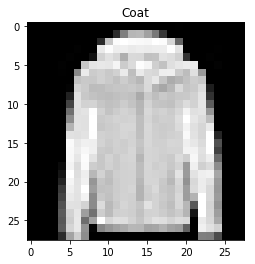

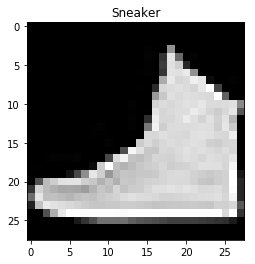

In [7]:
# Show images and labels
plt.imshow(train.images[0].reshape(28,28), cmap='gist_gray')
plt.title(types[str(train.labels[0])])
plt.show()

plt.imshow(train.images[23].reshape(28,28), cmap='gist_gray')
plt.title(types[str(train.labels[23])])
plt.show()

In [8]:
#Reshaping train and test set
X_train, X_test = train.images, test.images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train= X_train/32
X_test = X_test/32

In [9]:
Y_train, Y_test = train.labels, test.labels

In [10]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', Y_test.shape)

X_train shape:  (55000, 28, 28, 1)
y_train shape:  (55000,)
X_test shape:  (10000, 28, 28, 1)
y_test shape:  (10000,)


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,MaxPool2D
from keras.optimizers import RMSprop
class CnnIsFakeModel():
    # tuning parameter is defined within the __init__ for the sake of simplicity
    def __init__(self, inputshape):
        model = Sequential()

        model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                         activation ='relu', input_shape = (28,28,1)))
        model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                         activation ='relu'))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(0.25))


        model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'))
        model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'))
        model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
        model.add(Dropout(0.25))


        model.add(Flatten())
        model.add(Dense(512, activation = "relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(10, activation = "softmax"))
        optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
        self.model = model
    
    def getModel(self):
        return self.model
        

Using TensorFlow backend.


In [12]:
myCNN = CnnIsFakeModel((28,28,1))
myCNN.getModel().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [13]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [14]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
myCNN = CnnIsFakeModel((28,28,1))
myCNN.getModel().fit(X_train,Y_train,
                              epochs = 40, validation_data = (X_test,Y_test),
                              verbose = 1, batch_size=512
                              , callbacks=[learning_rate_reduction])

Train on 55000 samples, validate on 10000 samples
Epoch 1/40
55000/55000 [==============================] - 227s 4ms/step - loss: 0.6818 - acc: 0.7496 - val_loss: 0.4882 - val_acc: 0.8251
Epoch 2/40
55000/55000 [==============================] - 225s 4ms/step - loss: 0.4243 - acc: 0.8461 - val_loss: 0.4035 - val_acc: 0.8431
Epoch 3/40
55000/55000 [==============================] - 224s 4ms/step - loss: 0.3606 - acc: 0.8694 - val_loss: 0.4051 - val_acc: 0.8602
Epoch 4/40
55000/55000 [==============================] - 224s 4ms/step - loss: 0.3204 - acc: 0.8825 - val_loss: 0.3358 - val_acc: 0.8765
Epoch 5/40
55000/55000 [==============================] - 223s 4ms/step - loss: 0.2955 - acc: 0.8912 - val_loss: 0.2832 - val_acc: 0.8956
Epoch 6/40
55000/55000 [==============================] - 224s 4ms/step - loss: 0.2740 - acc: 0.8977 - val_loss: 0.3014 - val_acc: 0.8941
Epoch 7/40
55000/55000 [==============================] - 224s 4ms/step - loss: 0.2582 - acc: 0.9050 - val_loss: 0.2641 - 